#Exploratory Data Analysis (EDA) — Dataset Film dan Population

Notebook ini berisi tahapan lengkap EDA (Exploratory Data Analysis) untuk dataset Diabetes dan stroke, mulai dari:
1. Cleansing data  
2. Enrichment
3. Visualisasi  
4. Insight akhir  

---

📌 **Tujuan:**  
Mengidentifikasi pola distribusi data seperti genre, durasi, rating, dan tahun rilis film, untuk memahami tren konten yang populer dan diminati oleh penonton di platform streaming.

---

## **1.Import Library dan mounting drive**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Load Dataset**

In [ ]:
df_netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")
df_tmdb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tmdb_5000_movies.csv")

In [ ]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# **Data Cleansing - Dataset Netflix**



## **1. Mengahpus Duplikat data berdasarkan title**

In [ ]:
df_netflix.drop_duplicates(subset='title', inplace=True)

## **2.Menghilangkan whitespace pada teks**

In [ ]:
for col in ['title', 'director', 'country', 'listed_in']:
    df_netflix[col] = df_netflix[col].astype(str).str.strip()

## **3. Menangani Missing Values**

In [ ]:
# Tangani missing values
df_netflix.loc[:, 'director'] = df_netflix['director'].fillna('Unknown')
df_netflix.loc[:, 'country']  = df_netflix['country'].fillna('Unknown')
df_netflix.loc[:, 'rating']   = df_netflix['rating'].fillna('Not Rated')
df_netflix.loc[:, 'duration'] = df_netflix['duration'].fillna('Unknown')

## **4. Filtering Movies**

In [ ]:
netflix_movies = df_netflix[df_netflix['type'] == 'Movie'].copy()

## **5. Normalisasi kolom duration ke menit**

In [ ]:
netflix_movies['duration_min'] = (
    netflix_movies['duration']
    .str.replace(' min', '', regex=False)
    .replace('Unknown', np.nan)
    .astype(float)
)

## **6. Memilih kolom yang relevan**

In [ ]:
netflix_clean = netflix_movies[[
    'title', 'director', 'country', 'release_year',
    'rating', 'duration_min', 'listed_in'
]]

## **7. Hasil**

In [ ]:
netflix_clean.info()
netflix_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6131 non-null   object 
 1   director      6131 non-null   object 
 2   country       6131 non-null   object 
 3   release_year  6131 non-null   int64  
 4   rating        6131 non-null   object 
 5   duration_min  6128 non-null   float64
 6   listed_in     6131 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.2+ KB


,title,director,country,release_year,rating,duration_min,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90.0,Documentaries
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",nan,2021,PG,91.0,Children & Family Movies
7,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,United States,2021,PG-13,104.0,"Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127.0,"Dramas, International Movies"


# **Data Cleansing - Dataset TMDB**

## **1. Menghapus Duplikasi berdasarkan title**

In [ ]:
df_tmdb.drop_duplicates(subset='title', inplace=True)

## **2. Menangani missing values**

In [ ]:
df_tmdb.fillna({
    'budget': 0,
    'revenue': 0,
    'runtime': df_tmdb['runtime'].median()
}, inplace=True)

## **3. Menghilangkan whitespace pada teks**

In [ ]:
df_tmdb['title'] = df_tmdb['title'].astype(str).str.strip()

## **4. Normalisasi kolom release_date menjadi datetime dan menambah kolom release_year**

In [ ]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'], errors='coerce')
df_tmdb['release_year'] = df_tmdb['release_date'].dt.year

## **5. Menambahkan Kolom Profit dan ROI**

In [ ]:
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']
df_tmdb['roi'] = df_tmdb['profit'] / df_tmdb['budget']
df_tmdb['roi'] = df_tmdb['roi'].replace([np.inf, -np.inf], np.nan)


## **6. Filter film yang mempunyai data keuangan yang valid**

In [ ]:
df_tmdb_clean = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]

## **7. Memilih kolom yang relevan**

In [ ]:
tmdb_clean = df_tmdb[[
    'title', 'budget', 'revenue', 'profit', 'roi',
    'popularity', 'runtime', 'release_year', 'genres'
]]

## **8. hasil**

In [ ]:
tmdb_clean.info()
tmdb_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4800 non-null   object 
 1   budget        4800 non-null   int64  
 2   revenue       4800 non-null   int64  
 3   profit        4800 non-null   int64  
 4   roi           3764 non-null   float64
 5   popularity    4800 non-null   float64
 6   runtime       4800 non-null   float64
 7   release_year  4799 non-null   float64
 8   genres        4800 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 375.0+ KB


,title,budget,revenue,profit,roi,popularity,runtime,release_year,genres
0,Avatar,237000000,2787965087,2550965087,10.763566,150.437577,162.0,2009.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,2.203333,139.082615,169.0,2007.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,245000000,880674609,635674609,2.594590,107.376788,148.0,2015.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,250000000,1084939099,834939099,3.339756,112.312950,165.0,2012.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,260000000,284139100,24139100,0.092843,43.926995,132.0,2012.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


# **Penggabungan dataset**

In [ ]:
merged = pd.merge(
    netflix_clean,
    tmdb_clean,
    on=['title', 'release_year'],
    how='inner'
)


# **Data Visualization dan EDA**

## **1. Statistik Deskriptif**

In [ ]:
merged[['budget', 'revenue', 'profit', 'roi', 'runtime', 'duration_min', 'popularity']].describe()

,budget,revenue,profit,roi,runtime,duration_min,popularity
count,6.360000e+02,6.360000e+02,6.360000e+02,579.000000,636.000000,636.000000,636.000000
mean,4.241258e+07,1.235326e+08,8.112006e+07,26.330540,110.919811,111.301887,30.441629
std,4.473448e+07,1.546302e+08,1.281102e+08,535.675617,21.395228,21.423000,22.918237
min,0.000000e+00,0.000000e+00,-8.500000e+07,-1.000000,53.000000,45.000000,0.043023
25%,1.000000e+07,2.276873e+07,3.283713e+06,0.449716,96.000000,96.000000,14.812286
50%,2.700000e+07,7.056890e+07,3.582120e+07,1.545362,107.000000,107.500000,24.605541
75%,6.200000e+07,1.686150e+08,1.104288e+08,3.457436,121.000000,122.000000,40.245573
max,2.700000e+08,1.118889e+09,1.024889e+09,12889.386667,229.000000,229.000000,167.583710


## **2.Distribusi kategori (rating dan genre)**

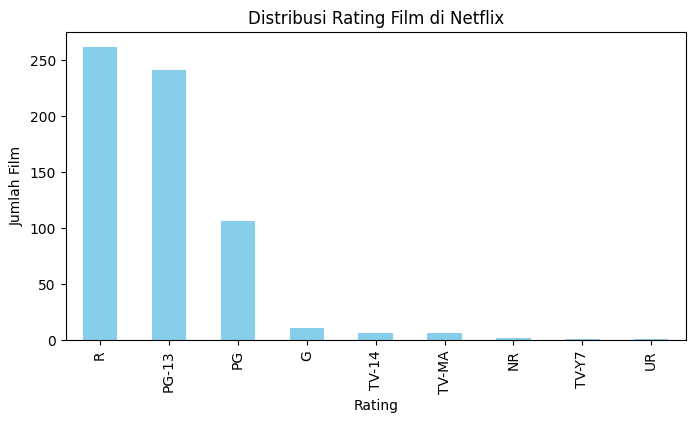

In [ ]:
plt.figure(figsize=(8,4))
merged['rating'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Distribusi Rating Film di Netflix')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')
plt.show()


## **3. Distribusi budget dan revenue**

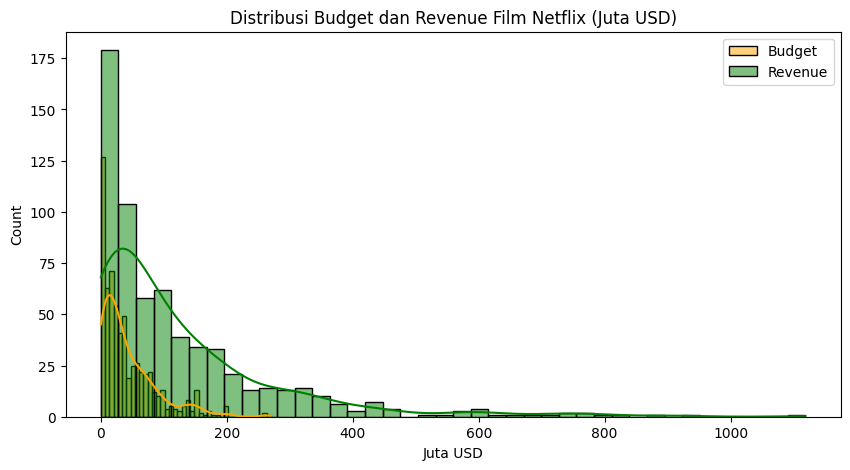

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(merged['budget']/1e6, bins=40, color='orange', label='Budget', kde=True)
sns.histplot(merged['revenue']/1e6, bins=40, color='green', label='Revenue', kde=True)
plt.legend()
plt.title('Distribusi Budget dan Revenue Film Netflix (Juta USD)')
plt.xlabel('Juta USD')
plt.show()


## **4. Korelasi numerik antar fitur utama**

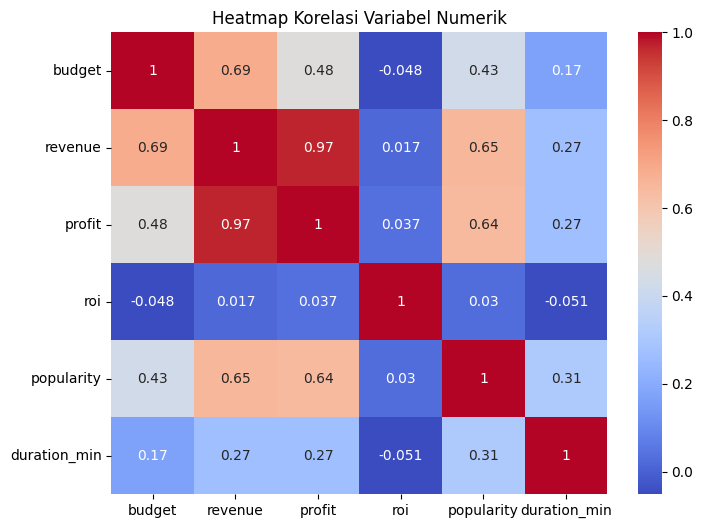

In [ ]:
plt.figure(figsize=(8,6))
corr = merged[['budget','revenue','profit','roi','popularity','duration_min']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()


## **5. Tren jumlah film Netflix per tahun**

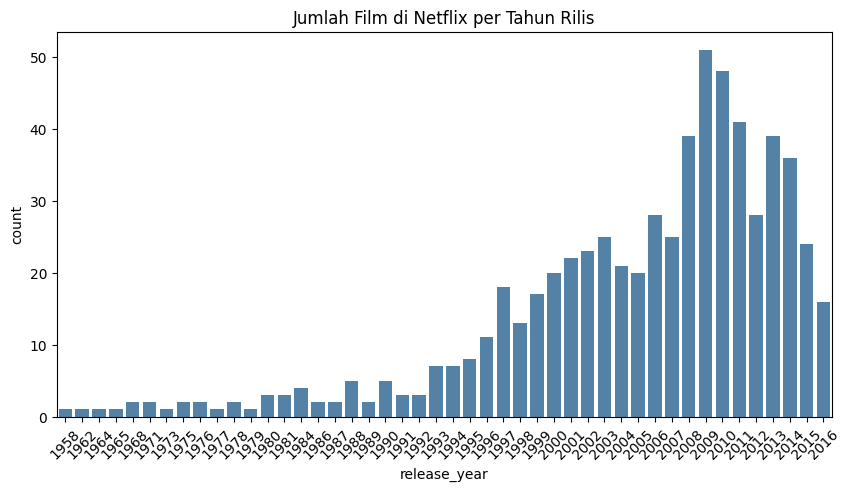

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged, x='release_year', color='steelblue')
plt.title('Jumlah Film di Netflix per Tahun Rilis')
plt.xticks(rotation=45)
plt.show()


## **6. Rata-rata revenue per tahun**

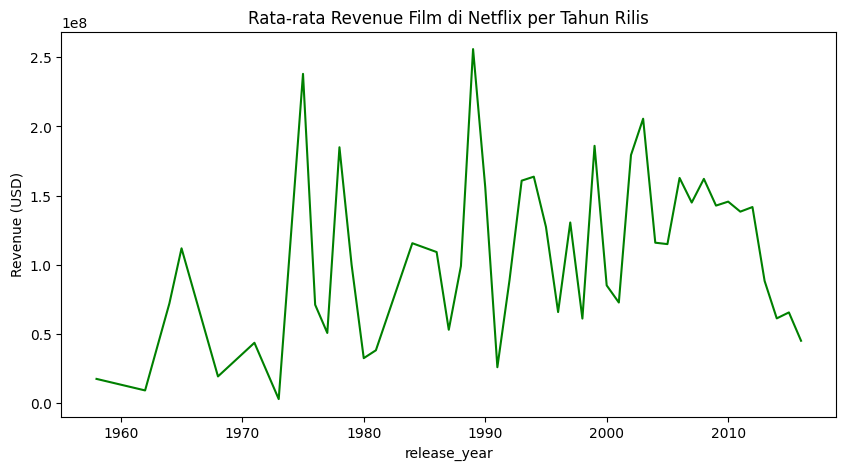

In [ ]:
yearly_revenue = merged.groupby('release_year')['revenue'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_revenue, x='release_year', y='revenue', color='green')
plt.title('Rata-rata Revenue Film di Netflix per Tahun Rilis')
plt.ylabel('Revenue (USD)')
plt.show()


## **7. Distribusi ROI**

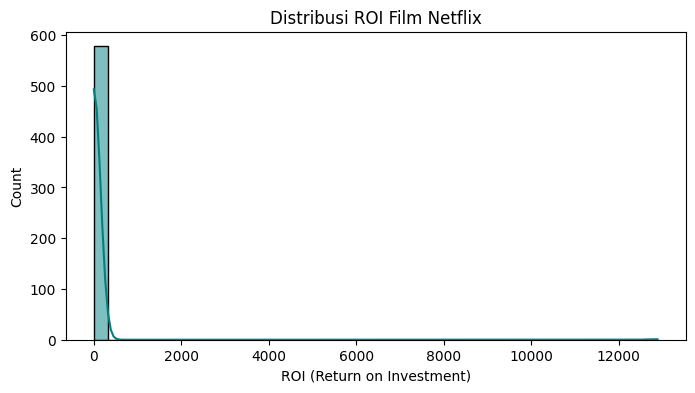

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(merged['roi'], bins=40, kde=True, color='teal')
plt.title('Distribusi ROI Film Netflix')
plt.xlabel('ROI (Return on Investment)')
plt.show()


## **8. Top 10 Film Paling Menguntungkan**

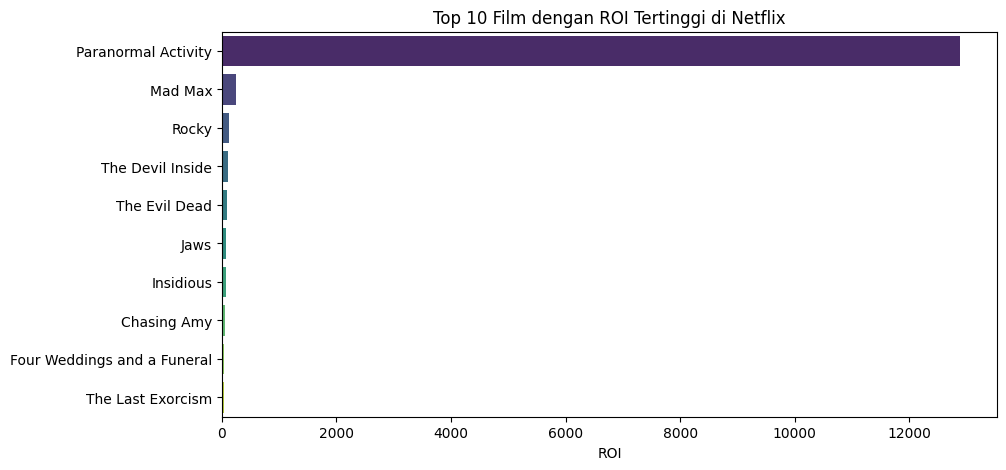

In [ ]:
top_roi = merged.nlargest(10, 'roi')[['title', 'roi', 'budget', 'revenue']]
plt.figure(figsize=(10,5))
sns.barplot(data=top_roi, y='title', x='roi', hue='title', palette='viridis', legend=False)
plt.title('Top 10 Film dengan ROI Tertinggi di Netflix')
plt.xlabel('ROI')
plt.ylabel('')
plt.show()


## **9. Durasi vs Revenue**

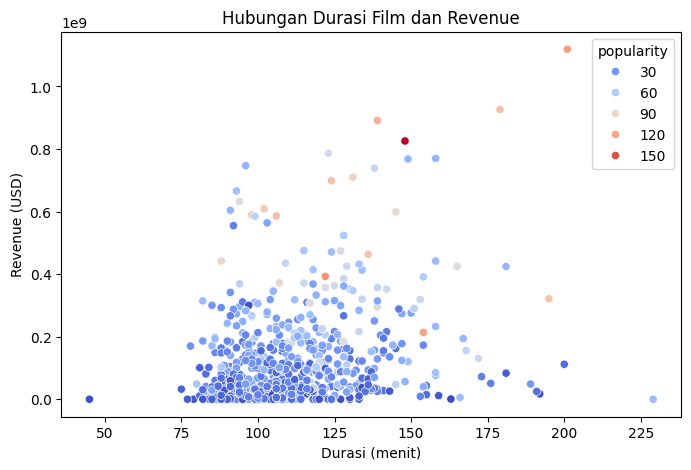

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='duration_min', y='revenue', hue='popularity', palette='coolwarm')
plt.title('Hubungan Durasi Film dan Revenue')
plt.xlabel('Durasi (menit)')
plt.ylabel('Revenue (USD)')
plt.show()


## **10. Top Movies Berdasarkan Revenue**

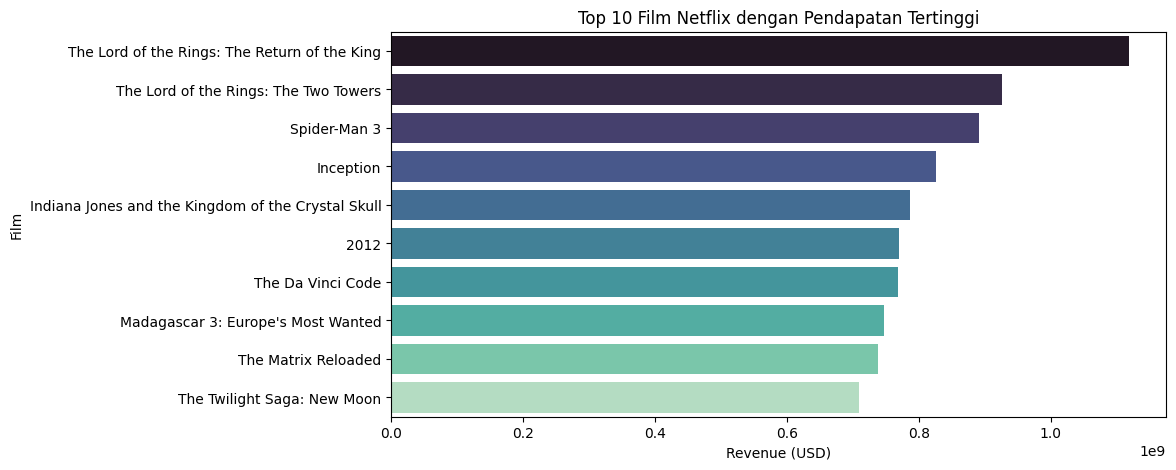

In [ ]:
top10 = merged.nlargest(10, 'revenue')[['title', 'revenue']]
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='revenue', y='title', hue='title', palette='mako', legend=False)
plt.title('Top 10 Film Netflix dengan Pendapatan Tertinggi')
plt.xlabel('Revenue (USD)')
plt.ylabel('Film')
plt.show()
